# Chapter 2 Exercises

## Set Up

In [1]:
# file paths
data_root = "https://raw.githubusercontent.com/kmerkl22/k-s-ISL/main/Data/"
image_root = "https://github.com/kmerkl22/k-s-ISL/raw/main/Images/"

In [2]:
# import numpy
import numpy as np

# import pyplot, subplots, images
from matplotlib import pyplot as plt
from matplotlib.pyplot import subplots
from matplotlib import image as img

#import pandas
import pandas as pd

In [3]:
# # random number generator seed
# rng = np.random.default_rng(3)

## Exercise 8

We are working with the college data set. First we will open it up in google sheets, it looks something like this:

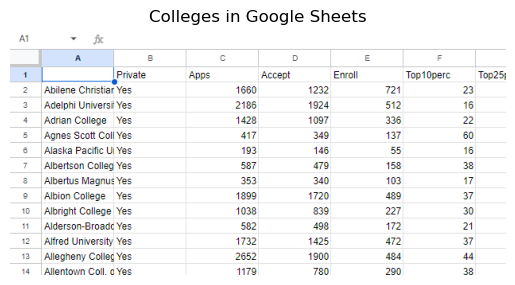

In [4]:
import PIL, urllib

url = image_root + "CollegesinGS.png"
image = PIL.Image.open(urllib.request.urlopen(url))
plt.title("Colleges in Google Sheets")
plt.imshow(image)
plt.axis('off')
plt.show()

a) We now want to read in our data and name the loaded data "college". We will use pandas (pd) to load the data in.

In [5]:
college_path = data_root + "College.csv"
college = pd.read_csv(college_path)

b) Next we look at the data

In [6]:
college

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


We don't really like this unnamed column, so we can try reading the data into pandas a few different ways:

In [7]:
college2 = pd.read_csv(college_path, index_col=0)
college2

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


For college2 we simply told pandas to use the first column (0) as the index

In [8]:
college3 = college.rename({'Unnamed: 0': 'College'},
axis=1)
#axis{0 or ‘index’, 1 or ‘columns’} tells it to do the mapping on the columns by setting axis=1
college3 = college3.set_index('College')
college3

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
College,,,,,,,,,,,,,,,,,,
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49


For college3 we rename the first column of college as "College" and also set this as the index. This is more like what we want, so lets save it as our 'college' dataframe.

In [9]:
college = college3

c) The describe() method produces a summary of each numerical column the colleges data frame.

In [10]:
college.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


d)  We want to use the pd.plotting.scatter_matrix() function to produce a
scatterplot matrix of the columns [Top10perc, Apps, Enroll].
First let's look at a list of columns in college:

In [11]:
college.columns

Index(['Private', 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend',
       'Grad.Rate'],
      dtype='object')

Selecting the 3 desired columns we make a scatterplot:

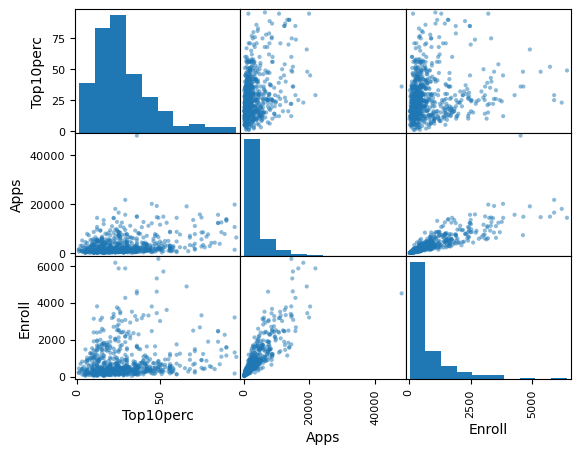

In [12]:
pd.plotting.scatter_matrix(college[['Top10perc', 'Apps', 'Enroll']]);

Let's also try selecting them by column number

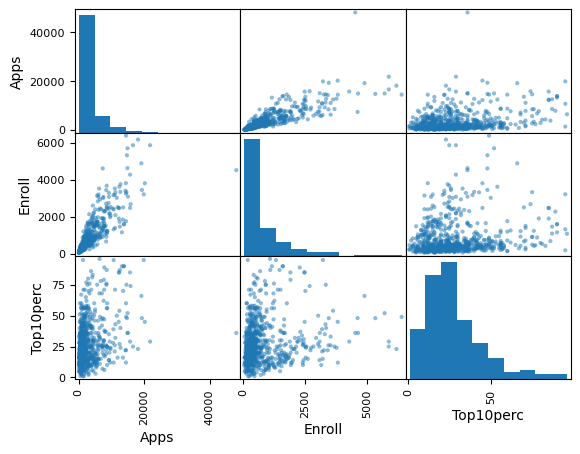

In [13]:
pd.plotting.scatter_matrix(college.iloc[:,[1,3,4]]);

e) Use the boxplot() method of college to produce side-by-side
boxplots of Outstate versus Private.

Private isn't a numerical value, so it doesn't make a lot of sense to do a boxplot of private. We instead make a boxplot for outstate by private, that makes a boxplot of outstate for public schools side by side with one for private schools.

<Axes: title={'center': 'Outstate'}, xlabel='Private'>

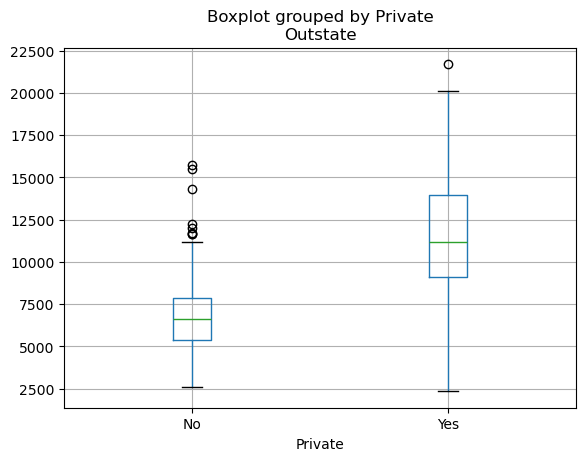

In [14]:
college.boxplot('Outstate', by='Private')

To see a side by side plot of two different columns, let's look at the top 10 and 25 percent side by side:

<Axes: >

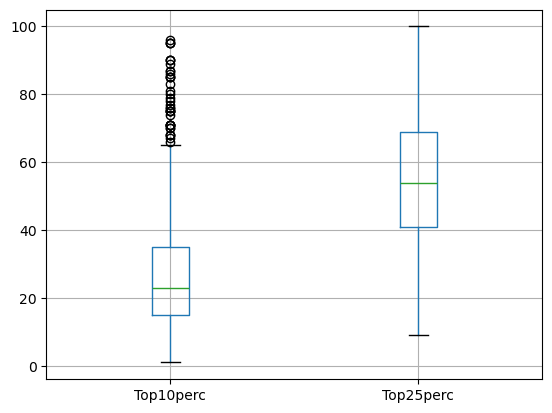

In [15]:
college.boxplot(column=['Top10perc', 'Top25perc'])  

f) Create a new qualitative variable, called Elite, by binning the
Top10perc variable into two groups based on whether or not the
proportion of students coming from the top 10% of their high
school classes exceeds 50%

In [16]:
college['Elite'] = pd.cut(college['Top10perc'],[0, 50, 100], labels=['No','Yes'])


Check what this new variable looks like

In [17]:
college['Elite']

College
Abilene Christian University       No
Adelphi University                 No
Adrian College                     No
Agnes Scott College               Yes
Alaska Pacific University          No
                                 ... 
Worcester State College            No
Xavier University                  No
Xavier University of Louisiana     No
Yale University                   Yes
York College of Pennsylvania       No
Name: Elite, Length: 777, dtype: category
Categories (2, object): ['No' < 'Yes']

Make a boxplot of Elite by Outstate

<Axes: title={'center': 'Outstate'}, xlabel='Elite'>

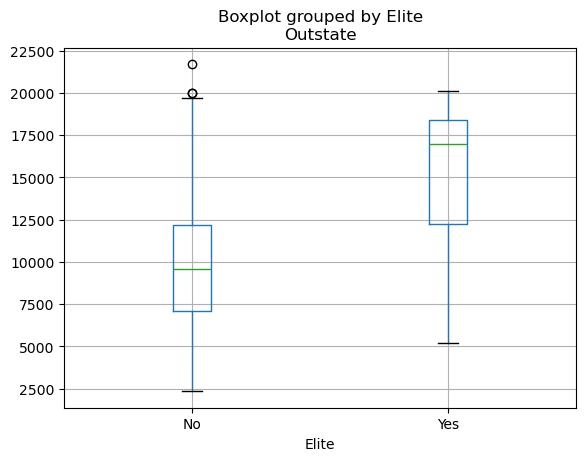

In [18]:
college.boxplot('Outstate', by='Elite')

Let's compare this to if we make a boxplot of Elite by Private:

Text(0.5, 0.98, '')

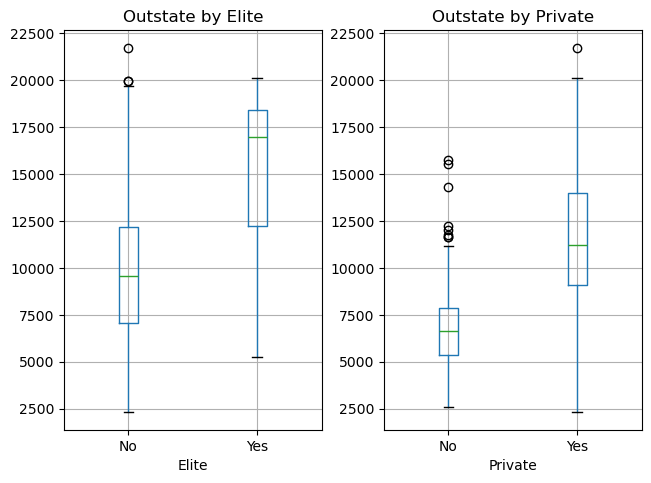

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True)
#constrained layout fixes spacing between graphs
college.boxplot('Outstate', by='Elite', ax=ax1)
college.boxplot('Outstate', by='Private', ax=ax2)
ax1.set_title('Outstate by Elite')
ax2.set_title('Outstate by Private')
fig.suptitle('') #removes automatic title

g) Use the plot.hist() method of college to produce some histograms with difering numbers of bins for a few of the quantitative variables. The command plt.subplots(2, 2) may be useful: it will divide the plot window into four regions so that four
plots can be made simultaneously. By changing the arguments
you can divide the screen up in other combinations.

Test the histogram method on all of college

<Axes: ylabel='Frequency'>

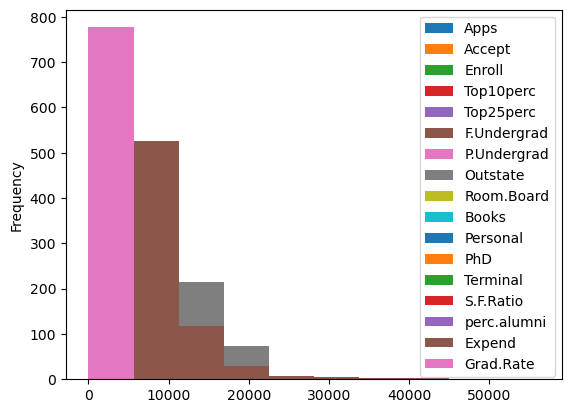

In [20]:
college.plot.hist()

Plot a few variables using histogram bins and 2x2 subplot

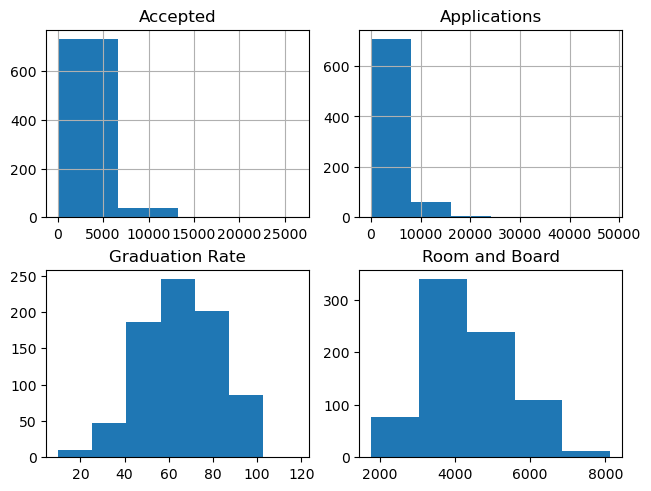

In [21]:
fig, axs = plt.subplots(2, 2, constrained_layout=True)
college['Accept'].hist(bins=4, ax=axs[0,0])
axs[0, 0].set_title('Accepted')
college['Apps'].hist(bins=6, ax=axs[0, 1])
axs[0, 1].set_title('Applications')
college['Grad.Rate'].plot.hist(bins=7, ax=axs[1, 0])
axs[1, 0].set_title('Graduation Rate')
college['Room.Board'].plot.hist(bins=5, ax=axs[1, 1])
axs[1, 1].set_title('Room and Board')

#we noticed some of the plots had undesirable ylabels, we iterate through the axes to remove them
for ax in axs.reshape(-1): 
  ax.set_ylabel('') 


## Exercise 9

This exercise involves the Auto data set studied in the lab.

Read in the data

In [22]:
# Auto = pd.read_csv(data_root + "Auto.data", delim_whitespace=True)
Auto = pd.read_csv(data_root + "Auto.data", sep='\s+')


a) Which of the predictors are quantitative, and which are qualitative?

Let's look at all the columns of Auto

In [23]:
# Print the column names and their data types
Auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    float64
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.0+ KB


We notice horsepower is type object, let's try to figure out why by looking at the unique values:

In [24]:
np.unique(Auto['horsepower'])

array(['100.0', '102.0', '103.0', '105.0', '107.0', '108.0', '110.0',
       '112.0', '113.0', '115.0', '116.0', '120.0', '122.0', '125.0',
       '129.0', '130.0', '132.0', '133.0', '135.0', '137.0', '138.0',
       '139.0', '140.0', '142.0', '145.0', '148.0', '149.0', '150.0',
       '152.0', '153.0', '155.0', '158.0', '160.0', '165.0', '167.0',
       '170.0', '175.0', '180.0', '190.0', '193.0', '198.0', '200.0',
       '208.0', '210.0', '215.0', '220.0', '225.0', '230.0', '46.00',
       '48.00', '49.00', '52.00', '53.00', '54.00', '58.00', '60.00',
       '61.00', '62.00', '63.00', '64.00', '65.00', '66.00', '67.00',
       '68.00', '69.00', '70.00', '71.00', '72.00', '74.00', '75.00',
       '76.00', '77.00', '78.00', '79.00', '80.00', '81.00', '82.00',
       '83.00', '84.00', '85.00', '86.00', '87.00', '88.00', '89.00',
       '90.00', '91.00', '92.00', '93.00', '94.00', '95.00', '96.00',
       '97.00', '98.00', '?'], dtype=object)

The problem is the '?' which is probably used for missing values.
To fix this, we provide `pd.read_csv()` with an argument called `na_values` and replace each instance of  `?` in the file is replaced with the
value `np.nan`.

In [25]:
# Auto = pd.read_csv(data_root + "Auto.data",
#                   na_values=['?'],
#                   delim_whitespace=True)
Auto = pd.read_csv(data_root + "Auto.data",
                  na_values=['?'],
                  sep='\s+')

Now if we look at the columns we should see horsepower is read in as a float.

In [26]:
Auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        397 non-null    float64
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.0+ KB


To check the type of data in each column, let's perform the same unique value analysis:

In [27]:
for col in Auto:
    print(col)
    print(Auto[col].unique())

mpg
[18.  15.  16.  17.  14.  24.  22.  21.  27.  26.  25.  10.  11.   9.
 28.  19.  12.  13.  23.  30.  31.  35.  20.  29.  32.  33.  17.5 15.5
 14.5 22.5 24.5 18.5 29.5 26.5 16.5 31.5 36.  25.5 33.5 20.5 30.5 21.5
 43.1 36.1 32.8 39.4 19.9 19.4 20.2 19.2 25.1 20.6 20.8 18.6 18.1 17.7
 27.5 27.2 30.9 21.1 23.2 23.8 23.9 20.3 21.6 16.2 19.8 22.3 17.6 18.2
 16.9 31.9 34.1 35.7 27.4 25.4 34.2 34.5 31.8 37.3 28.4 28.8 26.8 41.5
 38.1 32.1 37.2 26.4 24.3 19.1 34.3 29.8 31.3 37.  32.2 46.6 27.9 40.8
 44.3 43.4 36.4 44.6 40.9 33.8 32.7 23.7 23.6 32.4 26.6 25.8 23.5 39.1
 39.  35.1 32.3 37.7 34.7 34.4 29.9 33.7 32.9 31.6 28.1 30.7 24.2 22.4
 34.  38.  44. ]
cylinders
[8 4 6 3 5]
displacement
[307.  350.  318.  304.  302.  429.  454.  440.  455.  390.  383.  340.
 400.  113.  198.  199.  200.   97.  110.  107.  104.  121.  360.  140.
  98.  232.  225.  250.  351.  258.  122.  116.   79.   88.   71.   72.
  91.   97.5  70.  120.   96.  108.  155.   68.  114.  156.   76.   83.
  90.  231.  262. 

So the answer to part a) is mpg, cylinders, displacement, horsepower, weight, acceleration, and year are quantitative 
and origin and name are qualitative. Note that cylinders, year, and origin could all be potentially considered categorical qualitative data.

b) What is the range of each quantitative predictor? You can answer this using the min() and max() methods in numpy?

First, let's make a list of the numerical data column names, then calculate the range for each of them.

In [28]:
num_cols = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration' , 'year']
for col in num_cols:
    print(f"Range of {col} = {np.max(Auto[col])-np.min(Auto[col])}")
    

Range of mpg = 37.6
Range of cylinders = 5
Range of displacement = 387.0
Range of horsepower = 184.0
Range of weight = 3527.0
Range of acceleration = 16.8
Range of year = 12


c) What is the mean and standard deviation of each quantitative .max()
predictor?

We can find these values similarly to part b):

In [29]:
for col in num_cols:
    print(f"Mean of {col} = {np.mean(Auto[col])}")
    print(f"Standard Deviation of {col} = {np.std(Auto[col])}")

Mean of mpg = 23.51586901763224
Standard Deviation of mpg = 7.815941538224255
Mean of cylinders = 5.458438287153652
Standard Deviation of cylinders = 1.699432585509141
Mean of displacement = 193.53274559193954
Standard Deviation of displacement = 104.24803997948825
Mean of horsepower = 104.46938775510205
Standard Deviation of horsepower = 38.442032714425984
Mean of weight = 2970.2619647355164
Standard Deviation of weight = 846.8355568478047
Mean of acceleration = 15.55566750629723
Standard Deviation of acceleration = 2.746529639056109
Mean of year = 75.99496221662469
Standard Deviation of year = 3.6853546098832153


Notice we could also find many of these values using the describe method:

In [30]:
Auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,392.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,104.469388,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,38.491160,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,75.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,93.500000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


d) Now remove the 10th through 85th observations. What is the range, mean, and standard deviation of each predictor in the subset of the data that remains?

In [ ]:
data = Auto.drop(labels=range(10,86), axis=0)


# In[25]:


data


# In[26]:


np.max(data['mpg']), np.min(data['mpg']), np.mean(data['mpg']), np.std(data['mpg'])


# In[27]:


np.max(data['displacement']), np.min(data['displacement']), np.mean(data['displacement']), np.std(data['displacement'])


# In[28]:


np.max(data['horsepower']), np.min(data['horsepower']), np.mean(data['horsepower']), np.std(data['horsepower'])


# In[29]:


np.max(data['weight']), np.min(data['weight']), np.mean(data['weight']), np.std(data['weight'])


# In[30]:


np.max(data['acceleration']), np.min(data['acceleration']), np.mean(data['acceleration']), np.std(data['acceleration'])


# In[34]:


from matplotlib.pyplot import subplots
fig, ax = subplots(figsize=(8,8))
Auto.boxplot('mpg', by='horsepower', ax=ax);


# In[42]:


import matplotlib.pyplot as plt
plt.scatter(Auto['mpg'], Auto['horsepower']);
plt.xlabel("MPG");
plt.ylabel("Horsepower");


# In[43]:


plt.scatter(Auto['mpg'], Auto['displacement']);
plt.xlabel("MPG");
plt.ylabel("Displacement");


# In[44]:


plt.scatter(Auto['mpg'], Auto['weight']);
plt.xlabel("MPG");
plt.ylabel("Weight");


# In[45]:


plt.scatter(Auto['mpg'], Auto['acceleration']);
plt.xlabel("MPG");
plt.ylabel("Acceleration");


# In[46]:


plt.scatter(Auto['displacement'], Auto['horsepower']);
plt.xlabel("Displacement");
plt.ylabel("Horsepower");


# In[47]:


plt.scatter(Auto['weight'], Auto['horsepower']);
plt.xlabel("Weight");
plt.ylabel("Horsepower");


# In[48]:


plt.scatter(Auto['mpg'], Auto['year']);
plt.xlabel("MPG");
plt.ylabel("Year");


# In[49]:


plt.scatter(Auto['mpg'], Auto['cylinders']);
plt.xlabel("MPG");
plt.ylabel("Cylinders");


# In[50]:


plt.scatter(Auto['mpg'], Auto['origin']);
plt.xlabel("MPG");
plt.ylabel("Origin");

## Exercise 10

a) Load Boston data set

In [ ]:
from ISLP import load_data

In [ ]:
Boston = load_data('Boston')

In [ ]:
type(Boston)

Boston is of the correct type, dataframe

In [ ]:
Boston

Description from [site](https://islp.readthedocs.io/en/latest/datasets/Boston.html):

A data set containing housing values in 506 suburbs of Boston.
     
- `crim`: per capita crime rate by town.

- `zn`: proportion of residential land zoned for lots over 25,000
          sq.ft.

- `indus`: proportion of non-retail business acres per town.

- `chas`: Charles River dummy variable (= 1 if tract bounds river; 0
          otherwise).

- `nox`: nitrogen oxides concentration (parts per 10 million).

- `rm`: average number of rooms per dwelling.

- `age`: proportion of owner-occupied units built prior to 1940.

- `dis`: weighted mean of distances to five Boston employment
          centres.

- `rad`: index of accessibility to radial highways.

- `tax`: full-value property-tax rate per $10,000.

- `ptratio`: pupil-teacher ratio by town.

- `lstat`: lower status of the population (percent).

- `medv`: median value of owner-occupied homes in $1000s.

b) To get the rows and columns I'll look at the shape

In [ ]:
Boston.shape

We have 506 rows representing towns in the boston area and 13 columns representing features of them

c) Pairwise scatterplots

Look at columns

In [ ]:
Boston.columns

Make a scatterplot of a few

In [ ]:
pd.plotting.scatter_matrix(Boston.iloc[:,[0,3,4,9]]);

d) Predictors associated with per capita crime rate?


From above, it looks like there may be a correlation with nox. Let's try a few more.

In [ ]:
pd.plotting.scatter_matrix(Boston.iloc[:,[0,1,2,3,4,5,6]]);

In [ ]:
pd.plotting.scatter_matrix(Boston.iloc[:,[0,7,8,9,10,11,12]]);

Potential: nox, rm, age, lstat, medv

In [ ]:
pd.plotting.scatter_matrix(Boston[['crim', 'nox'
]])

In [ ]:
pd.plotting.scatter_matrix(Boston[['crim', 'rm'
]])

In [ ]:
pd.plotting.scatter_matrix(Boston[['crim', 'lstat'
]])

In [ ]:
pd.plotting.scatter_matrix(Boston[['crim', 'medv'
]])

e) Which suburbs have particularly high crime rates? Tax rates? Pupil-teacher ratios? Comment on the range of each predictor

Make boxplots to look for outliers

In [ ]:
#fig, ax = subplots(figsize=(8, 8))
#Boston.boxplot('crim', by='tax rates', ax=ax)

f)